In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Customer Churn.csv')
df.head()

,CustomerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replacing blanks values with 0 as tenure is 0 and no total charges are recorded.

In [20]:
import pandas as pd
df = pd.read_csv('Customer Churn.csv')
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [30]:
df.isnull().sum().sum()

0

In [31]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [32]:
df.duplicated().sum()

0

In [33]:
df["CustomerID"].duplicated().sum()

0

In [34]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

# Converted 0 and 1 value of senior citizen to yes/no to make it easier to understand.

<function matplotlib.pyplot.show(close=None, block=None)>

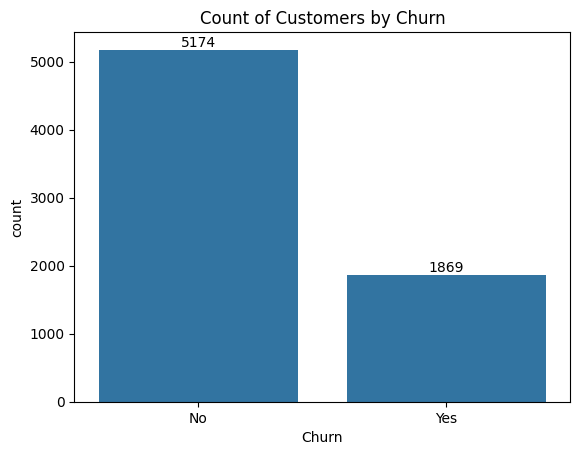

In [58]:
ax = sns.countplot(x = "Churn", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show

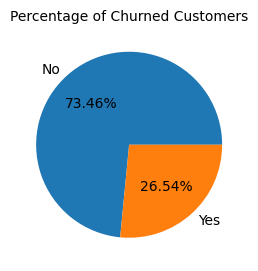

In [59]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

# From the given pie chart we can conclude that 26.54% of the customers have churned out.
# Not let's explore the reason behind it. 

<function matplotlib.pyplot.show(close=None, block=None)>

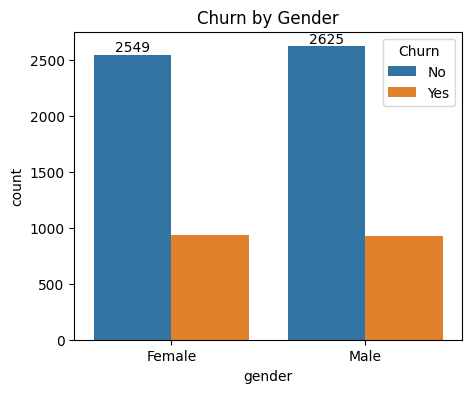

In [67]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x = "gender", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by Gender")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

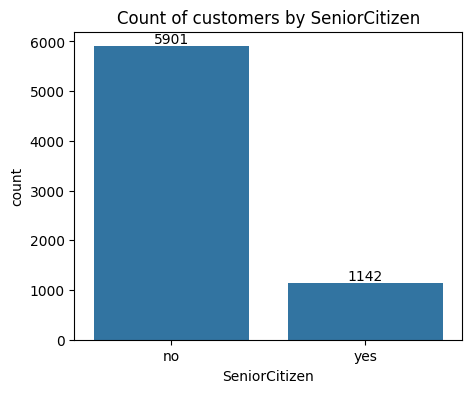

In [70]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by SeniorCitizen")
plt.show

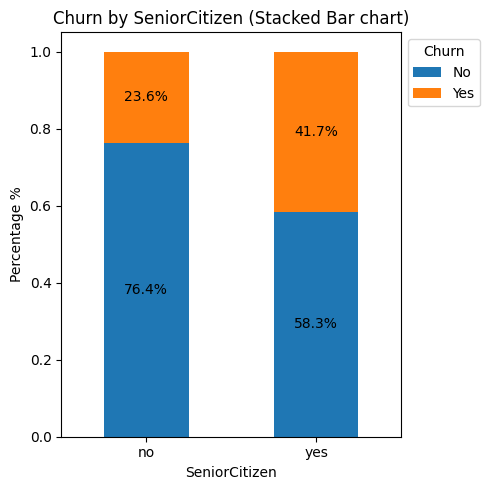

In [77]:
churn_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
churn_percentages = churn_counts.div(churn_counts.sum(axis=1), axis=0)

# Plot
fig, ax = plt.subplots(figsize=(5,5))

# Create the stacked bar chart
churn_percentages.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v*100:.1f}%' for v in container.datavalues], label_type='center')

# Set the title and labels
plt.title('Churn by SeniorCitizen (Stacked Bar chart)')
plt.ylabel('Percentage %')
plt.xlabel('SeniorCitizen')
plt.xticks(rotation = 0)
plt.legend(title = "Churn", bbox_to_anchor = (1,1))
plt.tight_layout()
plt.show()

# Comparative a greater perecentage of people in senior citizen category have churned.

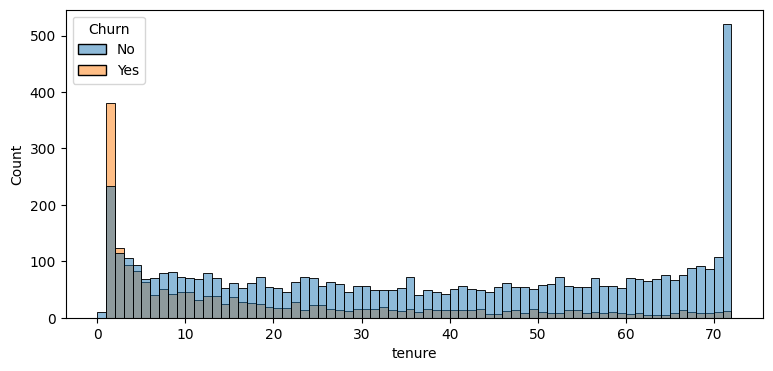

In [86]:
ax = plt.subplots(figsize=(9,4))
ax = sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

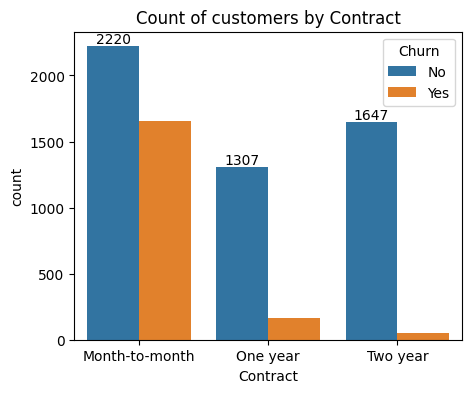

In [88]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Contract")
plt.show

# People who have used our services for a long time and have stayed for long time and people who have used our services #1 or 2 months have churned.

# People who have month to month contract are more likely to churn than those who have 1 or 2 years of contract.

In [4]:
df.columns.values

array(['CustomerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

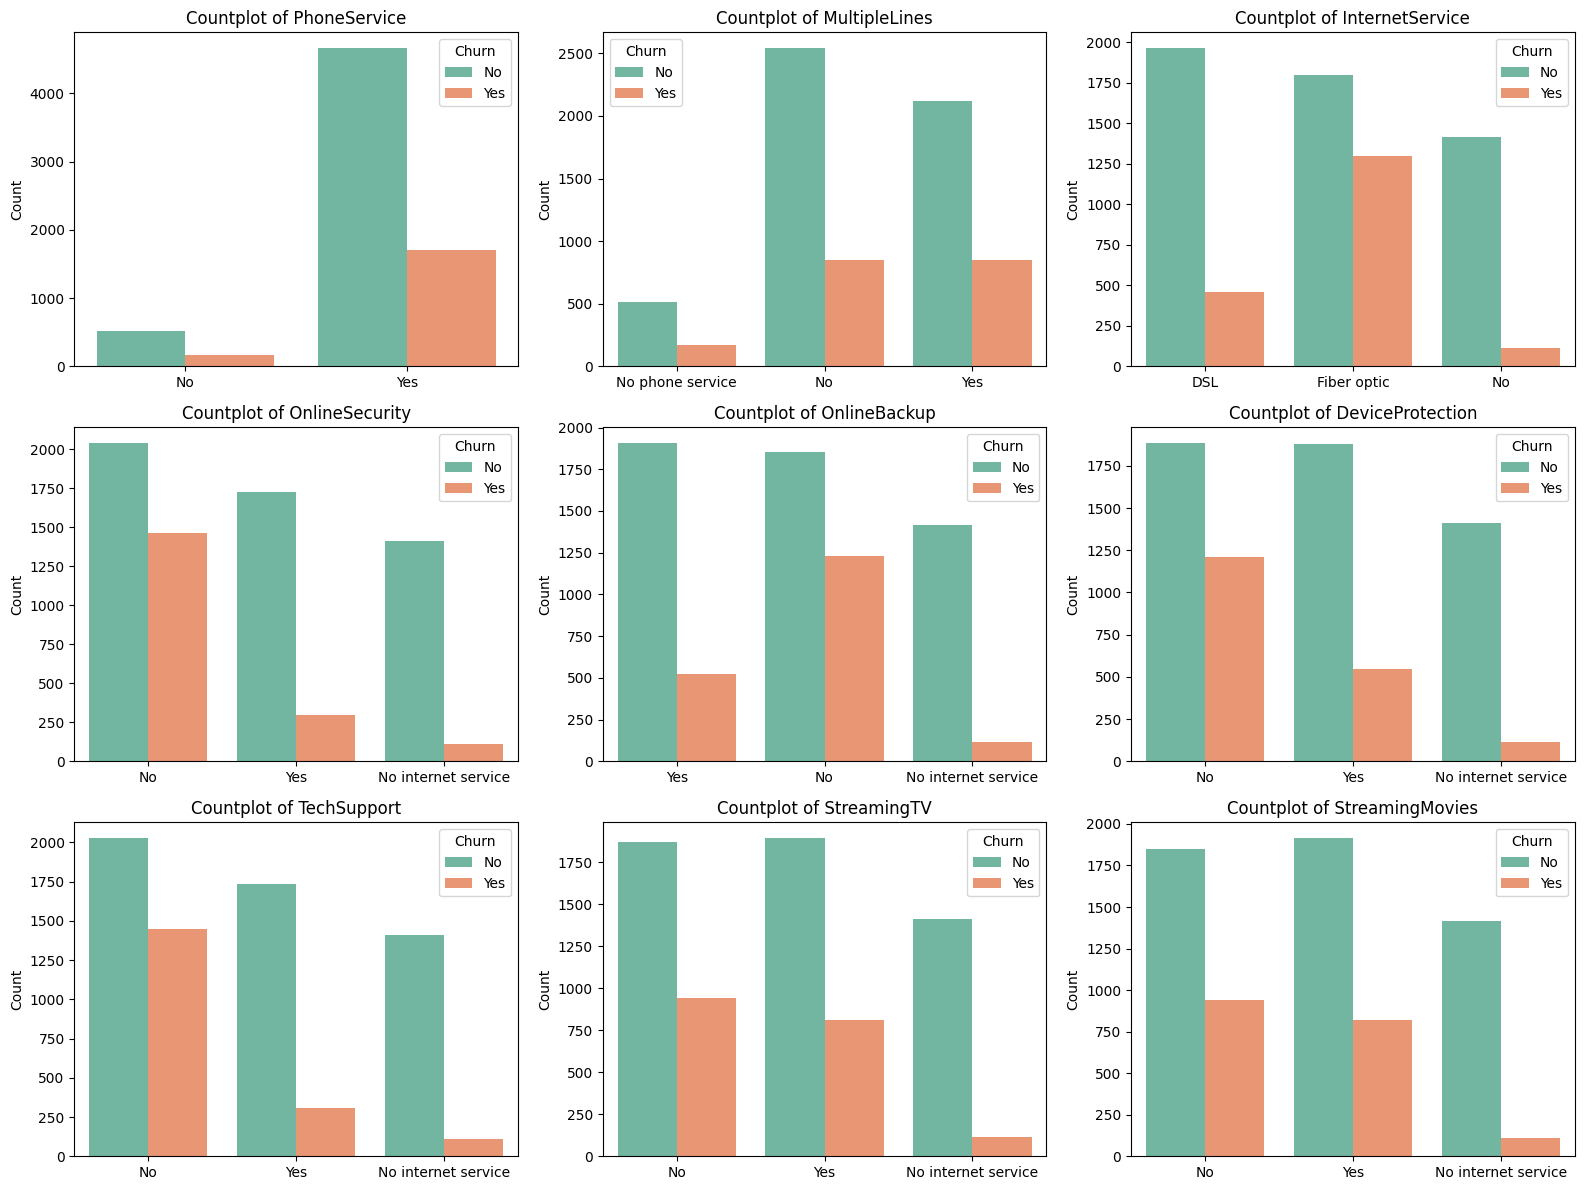

In [6]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns and rows for subplots
n_cols = 3
n_rows = len(columns) // n_cols + (len(columns) % n_cols > 0)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each column and plot the countplot
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i], palette="Set2", hue = "Churn")
    axes[i].set_title(f'Countplot of {column}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('')

# Remove any empty subplots if the number of plots is less than subplots created
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

 # customers with "No" or limited service tend to churn less frequently, except for Fiber optic users in InternetService, where churn is higher. Services like OnlineSecurity, TechSupport, and DeviceProtection show a trend where customers without these services are more likely to churn.

<function matplotlib.pyplot.show(close=None, block=None)>

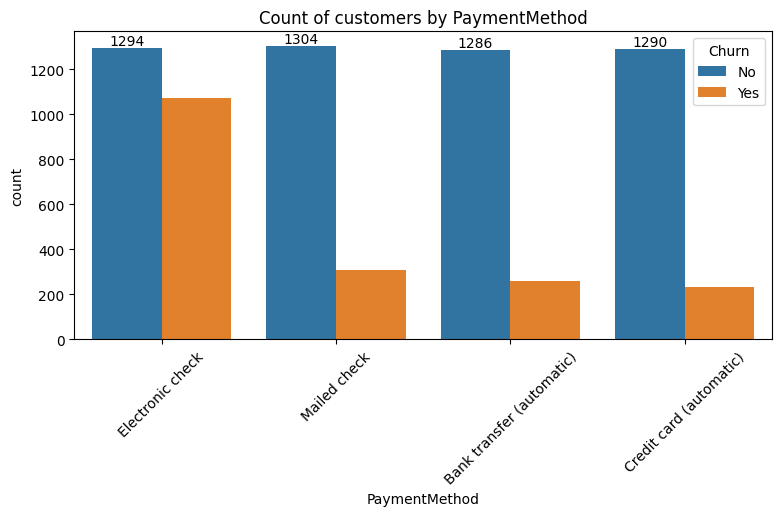

In [14]:
plt.figure(figsize=(9,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customers by PaymentMethod")
plt.xticks(rotation = 45)
plt.legend(title = "Churn", bbox_to_anchor = (1,1))
plt.show

# Customers are likely to churn when they are using electronic check as payment method.